O crosstab é uma função do Pandas muito útil para criar tabelas de contingência, que são tabelas que resumem a relação entre duas ou mais variáveis. Em resumo o crosstab facilita enxergarmos a quantidade de vezes em que a combinação de valores de diferentes variáveis ocorrem em nosso Dataset. Usando o Dataset da IBM como exemplo, com o crosstab é possível identificarmos de forma simples a quantidade de desligamentos de profissionais por área de atuação.

### Preparativos do Dataset (remoção de colunas sem variação de valores e categorizando as colunas ordenadas e não ordenadas)

In [2]:
import pandas as pd

BASE = "../datasets/HR-Employee-Attrition.csv"

df = pd.read_csv(BASE)


# Limpando a base de colunas com valores não variam e removendo a
# coluna de identificação (EmployeeNumber)

df = df.drop("EmployeeNumber", axis=1)

for c in df.columns:
    column = df[c]
    if (column.nunique() <= 1):
        print(c) 
        df = df.drop(c, axis=1)


# Separando nossas colunas por variáveis categóricas ordenadas e 
# não ordernadas


# Colunas que são categóricas e não ordenadas
columns_categorical_not_ordered = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime'
]

# Colunas que são categóricas e ordernadas
columns_categorical_ordered = [
    'Education',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance',
    'JobInvolvement'
]

target_column = ['Attrition']


numeric_columns = [
    column
    for column in df.columns
    if column not in (columns_categorical_ordered + columns_categorical_not_ordered + target_column)
]


# Convertendo nossas colunas não ordernadas para o tipo category

for column in columns_categorical_not_ordered:
    df[column] = df[column].astype("category")

EmployeeCount
Over18
StandardHours


In [8]:
pd.crosstab(df["Department"], df["Attrition"])

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


Acima estamos visualizando a relação entre "Departamento" e "Attrition" (sendo esta ultima a coluna que descrimina se o funcionário permanece ou não na empresa).

Ao visualizarmos que para o departamento "Human Resources" temos 51 para "No" e 12 para "Yes", leia-se que: 

   - O crosstab identificou que dos 1470 registros, 51 combinavam a coluna "Department" tendo como valor "Human Resources" **E** a coluna "Attrition" tendo como valor "No", podemos ler todos os demais valores da mesma forma. 	

#### Visualizando os dados do crosstab no formato de porcentagem

Para visualizar o **percentual** que um valor representa dentro do "universo" na qual está inserido podemos utilizar o "normalize"

In [15]:
pd.crosstab(df["Department"], df["Attrition"], normalize="index")

# Visualizamos os dados em um formato horizontal (O primeiro argumento do crosstab).

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278


*O normalize fará com que os valores sejam retornados em um formato percentual onde a soma dos valores é 1*

Podemos ler o retorno do crosstab acima como:  </br> </br>
    - Do "universo" do departamento "Human Resources", 80,95% dos funcionários **não saíram** e 19.05% **saíram** da empresa. </br>  </br>
    - Do "universo" do departamento "Research & Development", 86,16% dos funcionários **não saíram** e 13.84% **saíram** da empresa. </br>  </br>
    - Do "universo" do departamento "Sales", 79,37% dos funcionários **não saíram** e 20.63% **saíram** da empresa.

#### Visualizando os dados do crosstab no formato de porcentagem por "Attrition"

Os dados acima estavam sendo enxergados de uma perspectiva do departamento na qual os registros, ou seja, o "universo" era o departamento, mas podemos fazer com que nosso "universo" seja a coluna "Attrition" e vamos visualizar diferentes valores, para isso basta informarmos ao crosstab que desejamos visualizar nossos valores tendo como "universo" as colunas.

In [16]:
pd.crosstab(df["Department"], df["Attrition"], normalize="columns")

# Visualizamos os dados em um formato vertical (O segundo argumento do crosstab).

Attrition,No,Yes
Department,,
Human Resources,0.041363,0.050633
Research & Development,0.671533,0.561181
Sales,0.287105,0.388186


Podemos ler o retorno do crosstab acima como:  </br> </br>

    - Do "universo" de pessoas que permaneceram na empresa: 
        4,13% são de "Human Resources" 
    - Do "universo" de pessoas que saíram da empresa: 
        5,06% são de "Human Resources" 


    - Do "universo" de pessoas que permaneceram na empresa: 
        67,15% são de "Research & Development" 
    - Do "universo" de pessoas que saíram da empresa: 
        56,12% são de "Research & Development" 


    - Do "universo" de pessoas que permaneceram na empresa: 
        28,71% são de "Sales" 
    - Do "universo" de pessoas que saíram da empresa: 
        38,81% são de "Sales" 

#### Utilizando o margins

O margins é um argumento que passamos para o crosstab quando desejamos ver a soma dos registros:

In [17]:
pd.crosstab(df["Department"], df["Attrition"], margins=True)

Attrition,No,Yes,All
Department,,,
Human Resources,51,12,63
Research & Development,828,133,961
Sales,354,92,446
All,1233,237,1470


Por padrão o margins vai nomear a coluna com a soma dos valores com o nome "All", mas podemos customizar isso com o margins_name

In [19]:
pd.crosstab(df["Department"], df["Attrition"], margins=True ,margins_name="Total")

Attrition,No,Yes,Total
Department,,,
Human Resources,51,12,63
Research & Development,828,133,961
Sales,354,92,446
Total,1233,237,1470


#### Fazendo um gráfico a partir do crosstab

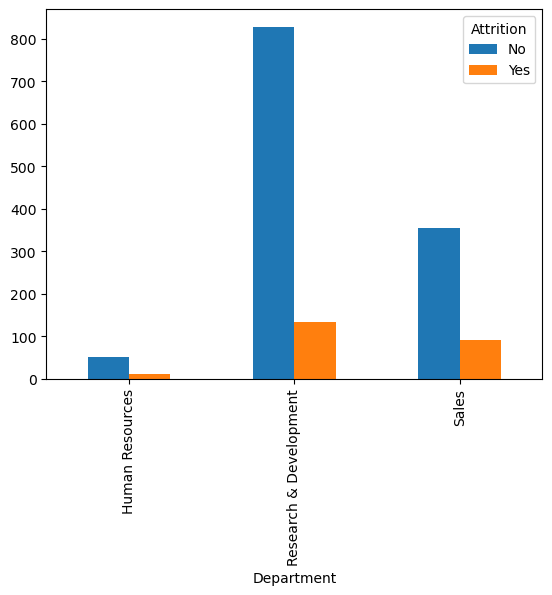

In [29]:
pd.crosstab(df["Department"], df["Attrition"]).plot(kind="bar");